In [1]:
import os
import pickle
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement
plt.rcParams['font.size'] = 11
from kid_readout.measure import measurement, nc, load
from utilities import histogram, log_bin, snm_log_bin, ss_log_bin

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data_directory = '/data/readout'
resonator_index = 13  # This should be the 164 MHz resonance, aka channel 8

In [3]:
with open('cw_ncs.pkl') as f:
    cw_ncs = pickle.load(f)
with open('bb_ncs.pkl') as f:
    bb_ncs = pickle.load(f)

In [4]:
pca_NFFT = 2**15
pca_detrend = mlab.detrend_mean  # the default is detrend_mean
resonator_index = 13
index_a29 = 7
index_a23 = 9
deglitch_threshold = 5  # default

In [5]:
cw_snm_a29_tt07 = noise_measurement.SweepNoiseMeasurement(cw_ncs[11],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          deglitch_threshold=deglitch_threshold,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=pca_detrend,
                                                          pca_use_log_bins=False
                                                         )
print("Atten: {}".format(cw_snm_a29_tt07.atten))
print("Turns: {}".format(np.sum(cw_snm_a29_tt07.mmw_atten_turns)))

/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]


Atten: 29.0
Turns: 7.0


/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:93: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


In [6]:
cw_snm_a23_tt07 = noise_measurement.SweepNoiseMeasurement(cw_ncs[11],
                                                          sweep_group_index=index_a23,
                                                          timestream_group_index=index_a23,
                                                          resonator_index=resonator_index,
                                                          deglitch_threshold=deglitch_threshold,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=pca_detrend,
                                                          pca_use_log_bins=False
                                                         )
print("Atten: {}".format(cw_snm_a23_tt07.atten))
print("Turns: {}".format(np.sum(cw_snm_a23_tt07.mmw_atten_turns)))

Atten: 23.0
Turns: 7.0


In [7]:
bb_snm_a23_tt07 = noise_measurement.SweepNoiseMeasurement(bb_ncs[11],
                                                          sweep_group_index=index_a23,
                                                          timestream_group_index=index_a23,
                                                          resonator_index=resonator_index,
                                                          deglitch_threshold=deglitch_threshold,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=pca_detrend,
                                                          pca_use_log_bins=False
                                                         )
print("Atten: {}".format(bb_snm_a23_tt07.atten))
print("Turns: {}".format(np.sum(bb_snm_a23_tt07.mmw_atten_turns)))

Atten: 23.0
Turns: 7.0


In [8]:
bb_snm_a29_tt16 = noise_measurement.SweepNoiseMeasurement(bb_ncs[2],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          deglitch_threshold=deglitch_threshold,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=pca_detrend,
                                                          pca_use_log_bins=False
                                                         )
print("Atten: {}".format(bb_snm_a29_tt16.atten))
print("Turns: {}".format(np.sum(bb_snm_a29_tt16.mmw_atten_turns)))

Atten: 29.0
Turns: 16.0


In [9]:
n_bins = 100

In [10]:
bins_a23_tt07, Sx_a23_tt07, Cx_a23_tt07 = log_bin(cw_snm_a23_tt07.pca_freq[1] - cw_snm_a23_tt07.pca_freq[0],
                                                  cw_snm_a23_tt07.pca_eigvals[1][1:],
                                                  n_bins)
bins_a23_tt07, Si_a23_tt07, Cx_a23_tt07 = log_bin(cw_snm_a23_tt07.pca_freq[1] - cw_snm_a23_tt07.pca_freq[0],
                                                  cw_snm_a23_tt07.pca_eigvals[0][1:],
                                                  n_bins)

In [11]:
bins_a29_tt07, Sx_a29_tt07, Cx_a29_tt07 = log_bin(cw_snm_a29_tt07.pca_freq[1] - cw_snm_a29_tt07.pca_freq[0],
                                                  cw_snm_a29_tt07.pca_eigvals[1][1:],
                                                  n_bins)
bins_a29_tt07, Si_a29_tt07, Cx_a29_tt07 = log_bin(cw_snm_a29_tt07.pca_freq[1] - cw_snm_a29_tt07.pca_freq[0],
                                                  cw_snm_a29_tt07.pca_eigvals[0][1:],
                                                  n_bins)

In [12]:
bins_bb_a23_tt07, Sx_bb_a23_tt07, Cx_bb_a23_tt07 = log_bin(bb_snm_a23_tt07.pca_freq[1] - bb_snm_a23_tt07.pca_freq[0],
                                                           bb_snm_a23_tt07.pca_eigvals[1][1:],
                                                           n_bins)
bins_bb_a23_tt07, Si_bb_a23_tt07, Cx_bb_a23_tt07 = log_bin(bb_snm_a23_tt07.pca_freq[1] - bb_snm_a23_tt07.pca_freq[0],
                                                           bb_snm_a23_tt07.pca_eigvals[0][1:],
                                                           n_bins)

In [13]:
bins_bb_a29_tt16, Sx_bb_a29_tt16, Cx_bb_a29_tt16 = log_bin(bb_snm_a29_tt16.pca_freq[1] - bb_snm_a29_tt16.pca_freq[0],
                                                           bb_snm_a29_tt16.pca_eigvals[1][1:],
                                                           n_bins)
bins_bb_a29_tt16, Si_bb_a29_tt16, Cx_bb_a29_tt16 = log_bin(bb_snm_a29_tt16.pca_freq[1] - bb_snm_a29_tt16.pca_freq[0],
                                                           bb_snm_a29_tt16.pca_eigvals[0][1:],
                                                           n_bins)

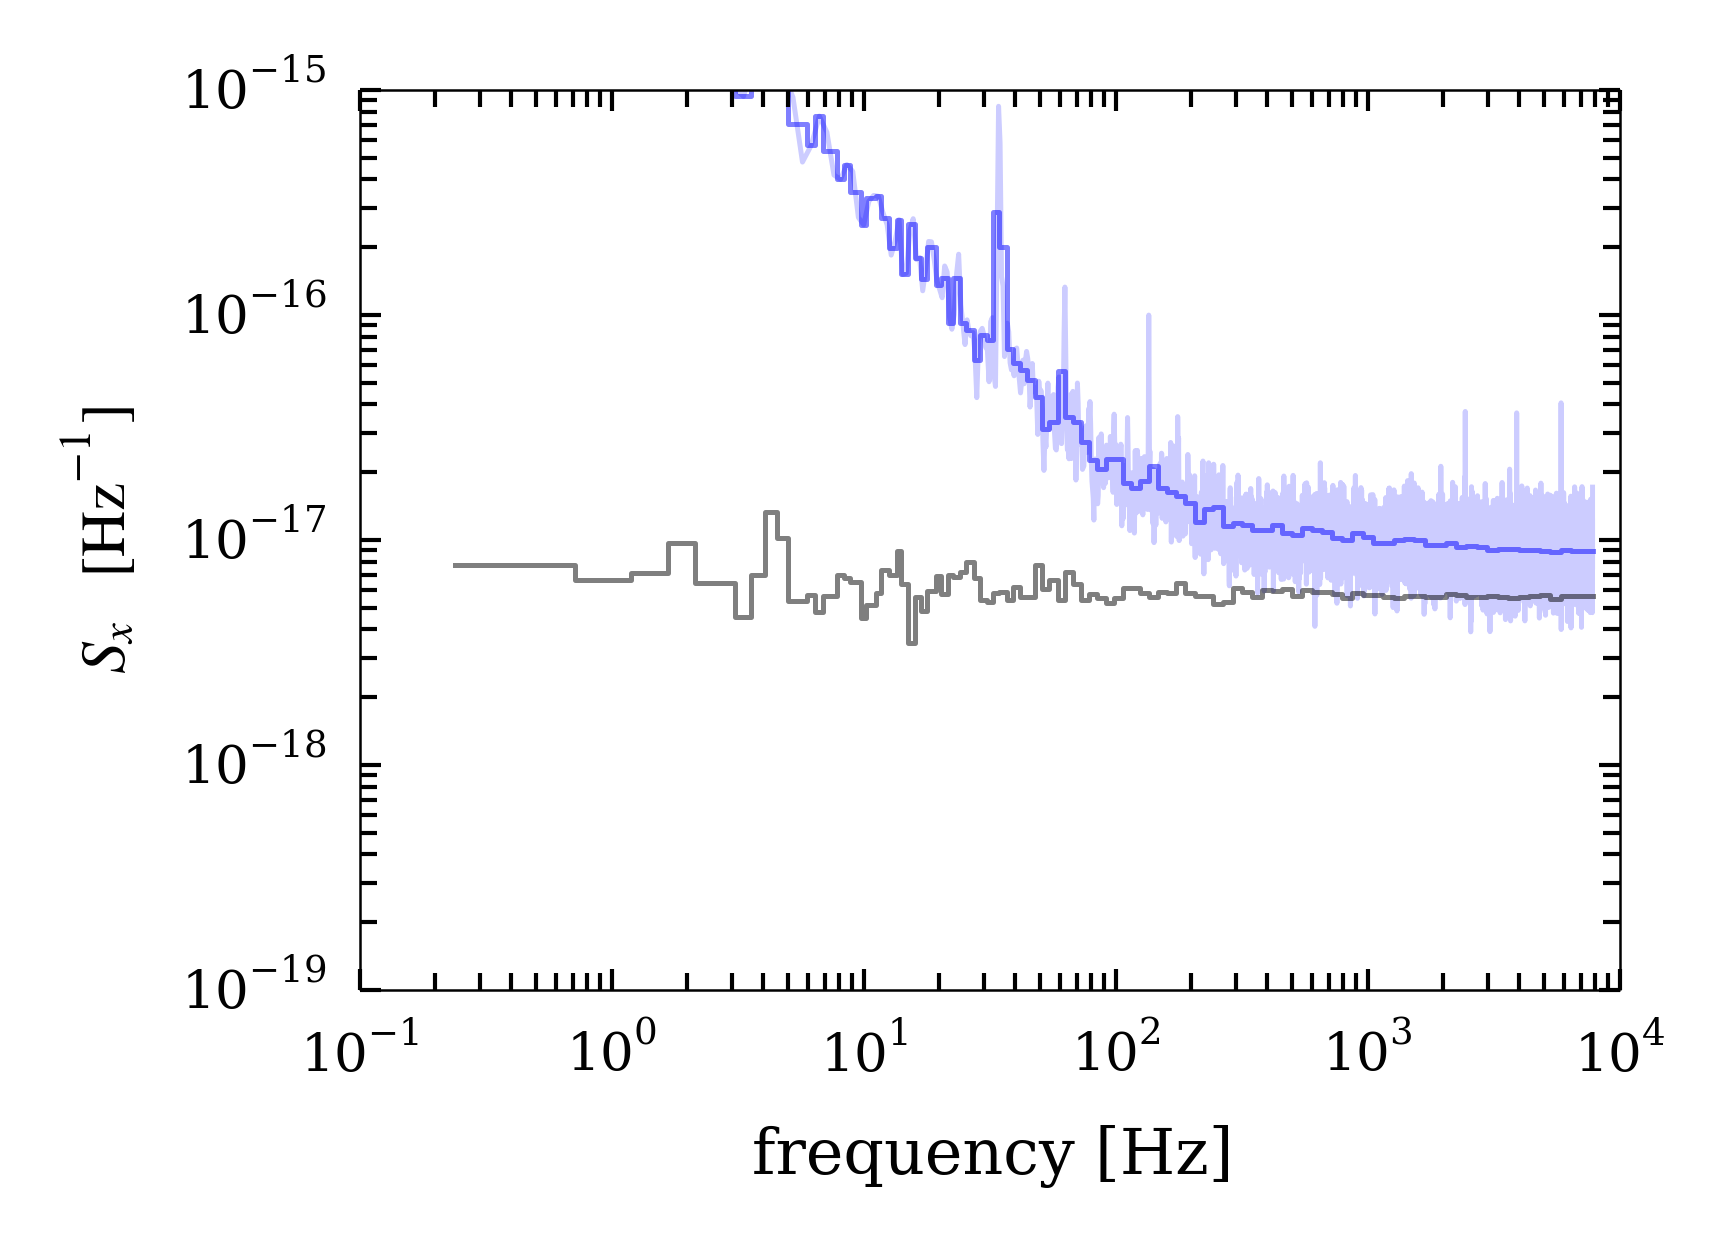

In [14]:
fig, ax = plt.subplots()

ax.plot(cw_snm_a29_tt07.pca_freq,
        cw_snm_a29_tt07.pca_eigvals[1],
        '-b', alpha=0.2)
histogram(ax, bins_a29_tt07, Sx_a29_tt07, color='blue', alpha=0.5)
histogram(ax, bins_a29_tt07, Si_a29_tt07, color='black', alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_ylim(1e-19, 1e-15);

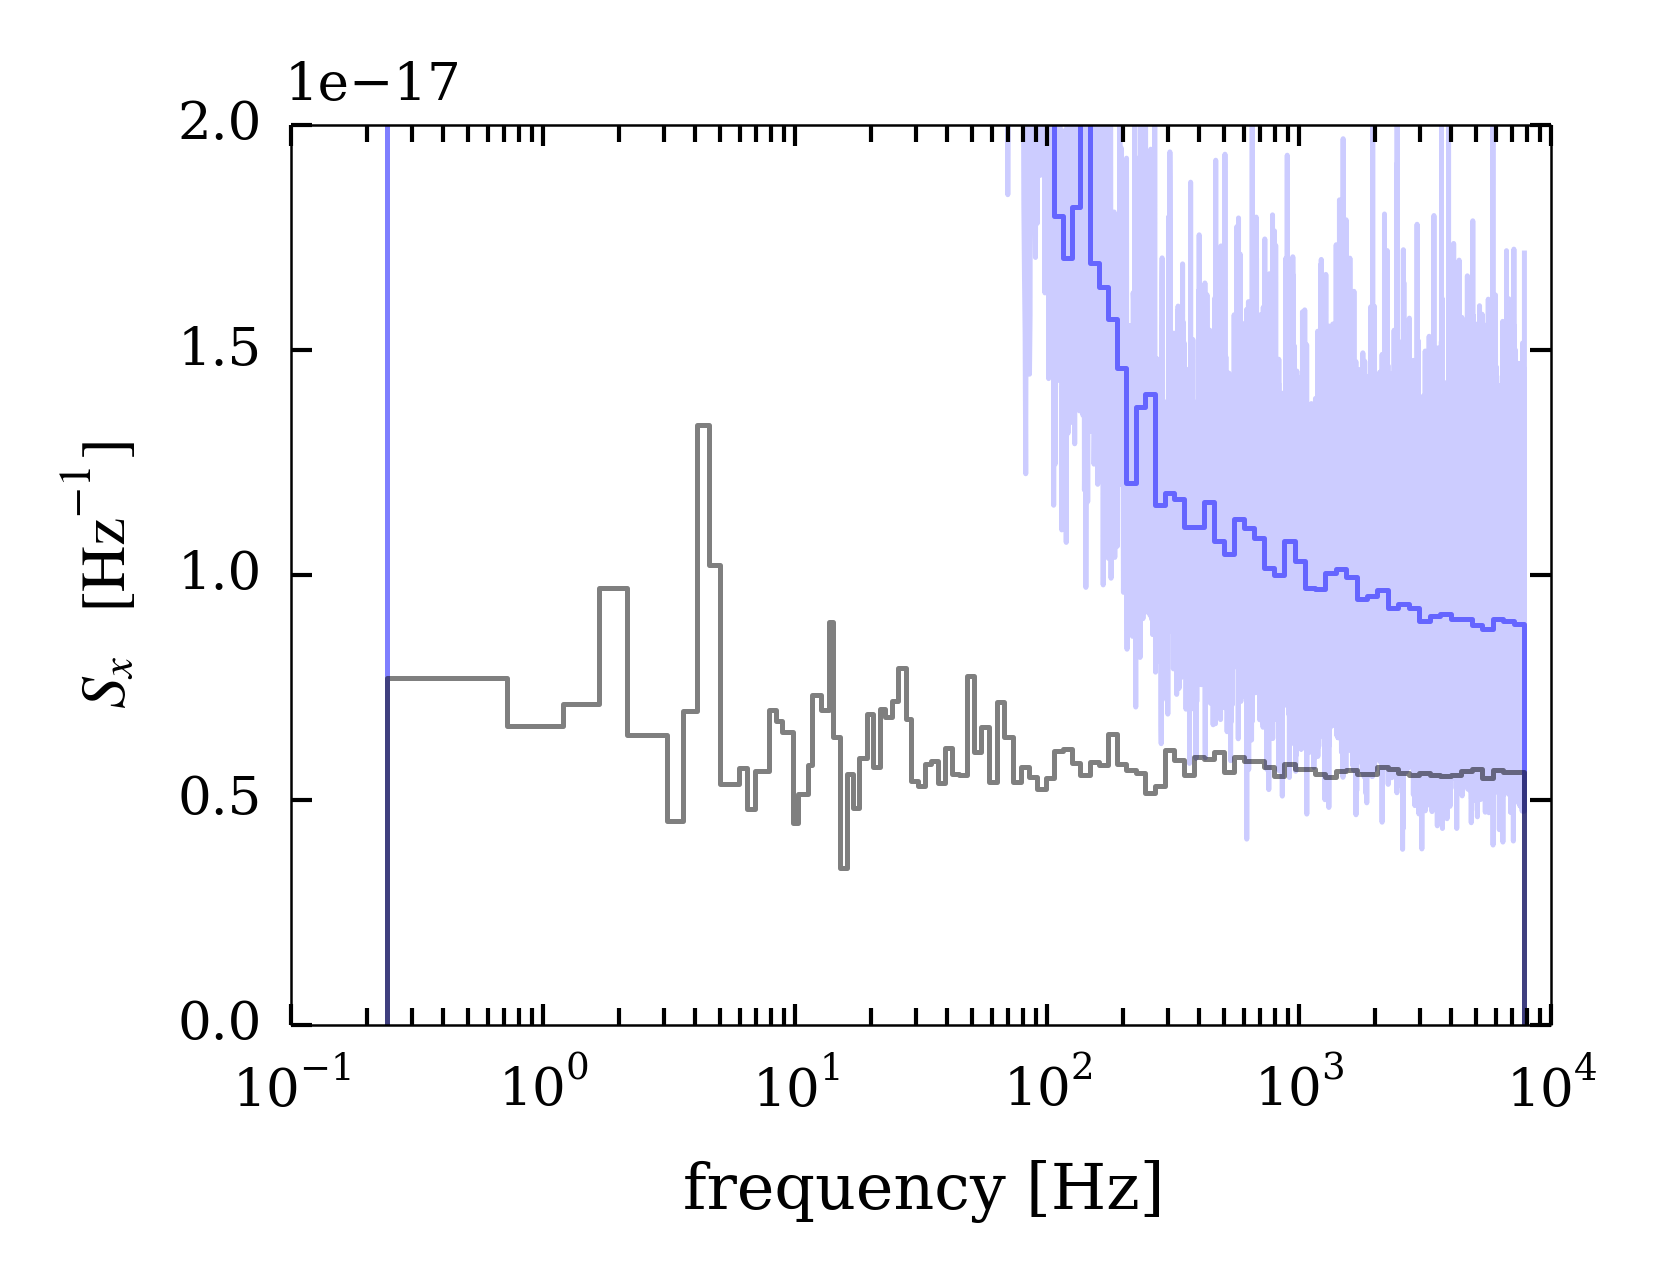

In [15]:
fig, ax = plt.subplots()

ax.plot(cw_snm_a29_tt07.pca_freq,
        cw_snm_a29_tt07.pca_eigvals[1],
        '-b', alpha=0.2)
histogram(ax, bins_a29_tt07, Sx_a29_tt07, color='blue', alpha=0.5)
histogram(ax, bins_a29_tt07, Si_a29_tt07, color='black', alpha=0.5)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_ylim(0, 2e-17);

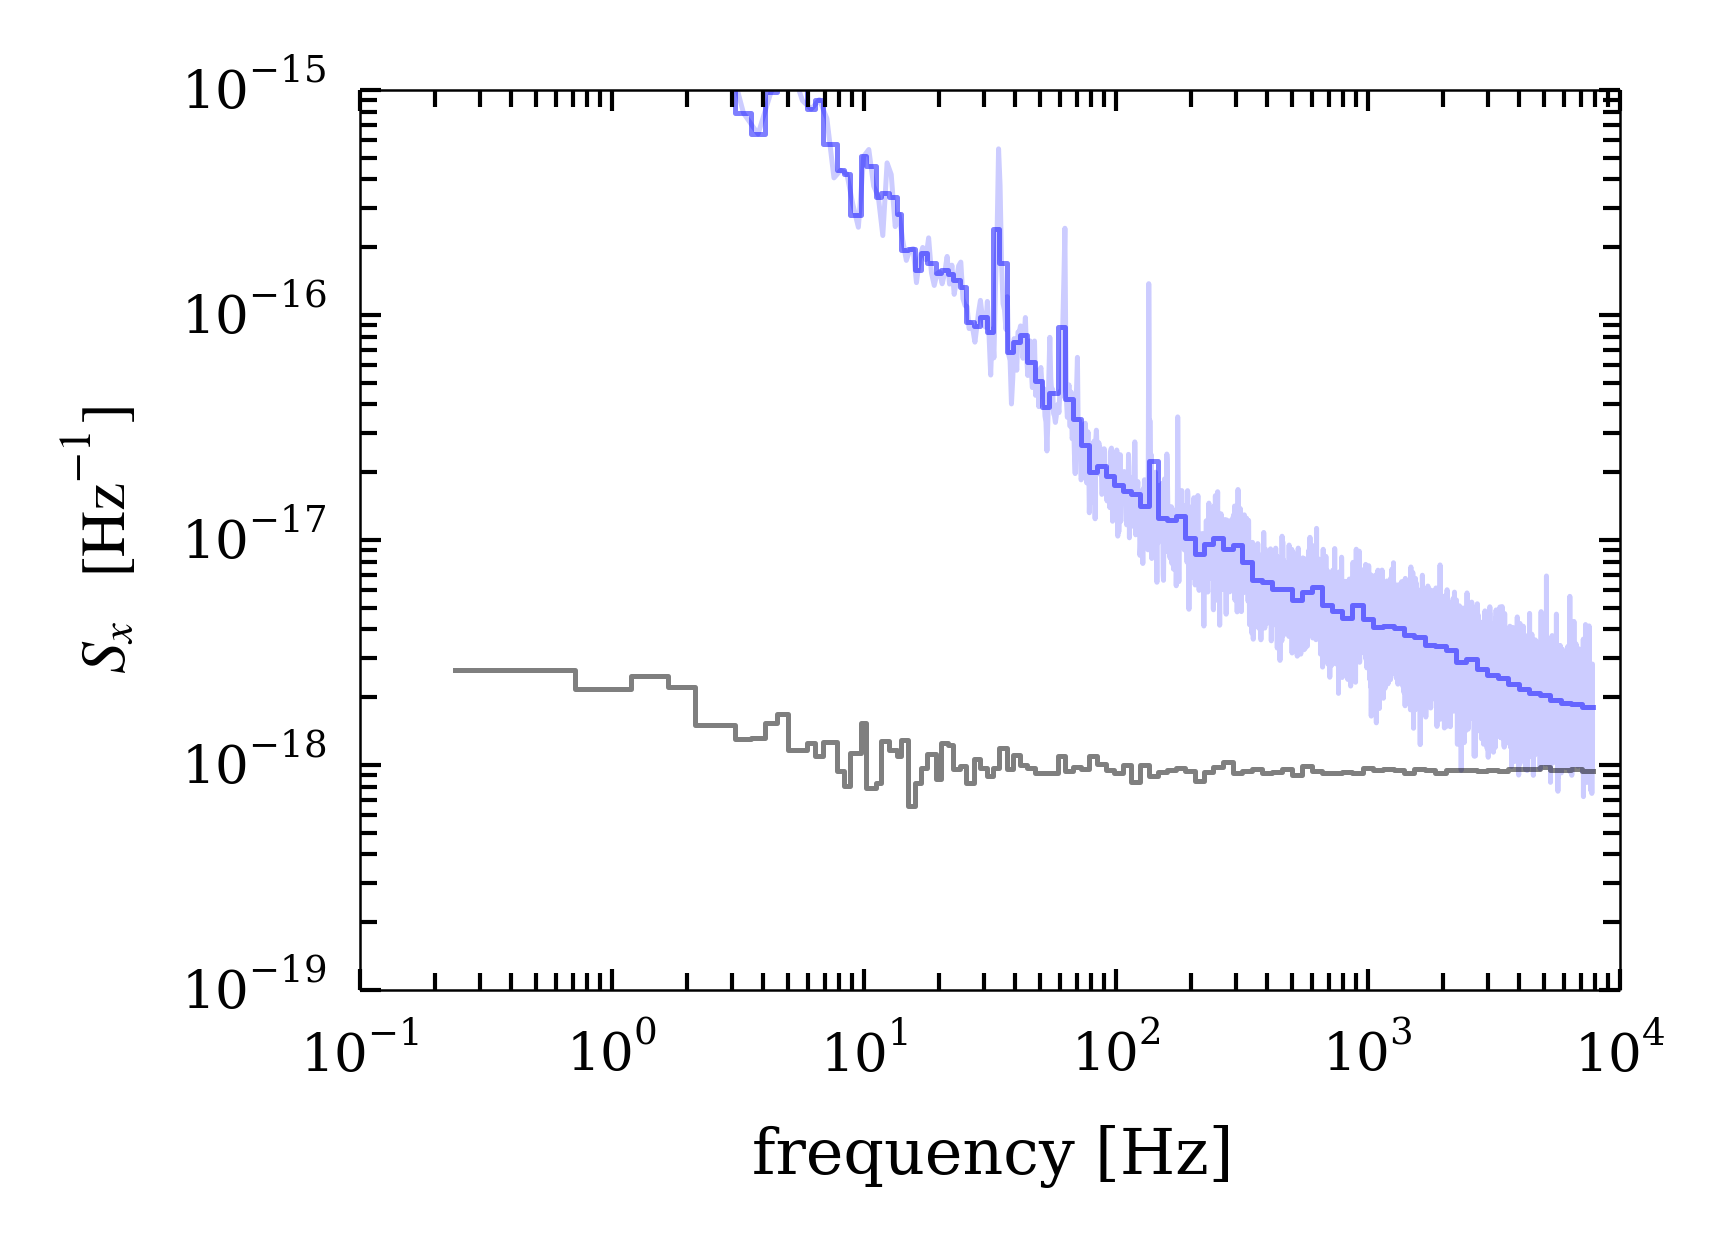

In [16]:
fig, ax = plt.subplots()

ax.plot(cw_snm_a23_tt07.pca_freq,
        cw_snm_a23_tt07.pca_eigvals[1],
        '-b', alpha=0.2)
histogram(ax, bins_a23_tt07, Sx_a23_tt07, color='blue', alpha=0.5)
histogram(ax, bins_a23_tt07, Si_a23_tt07, color='black', alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_ylim(1e-19, 1e-15);

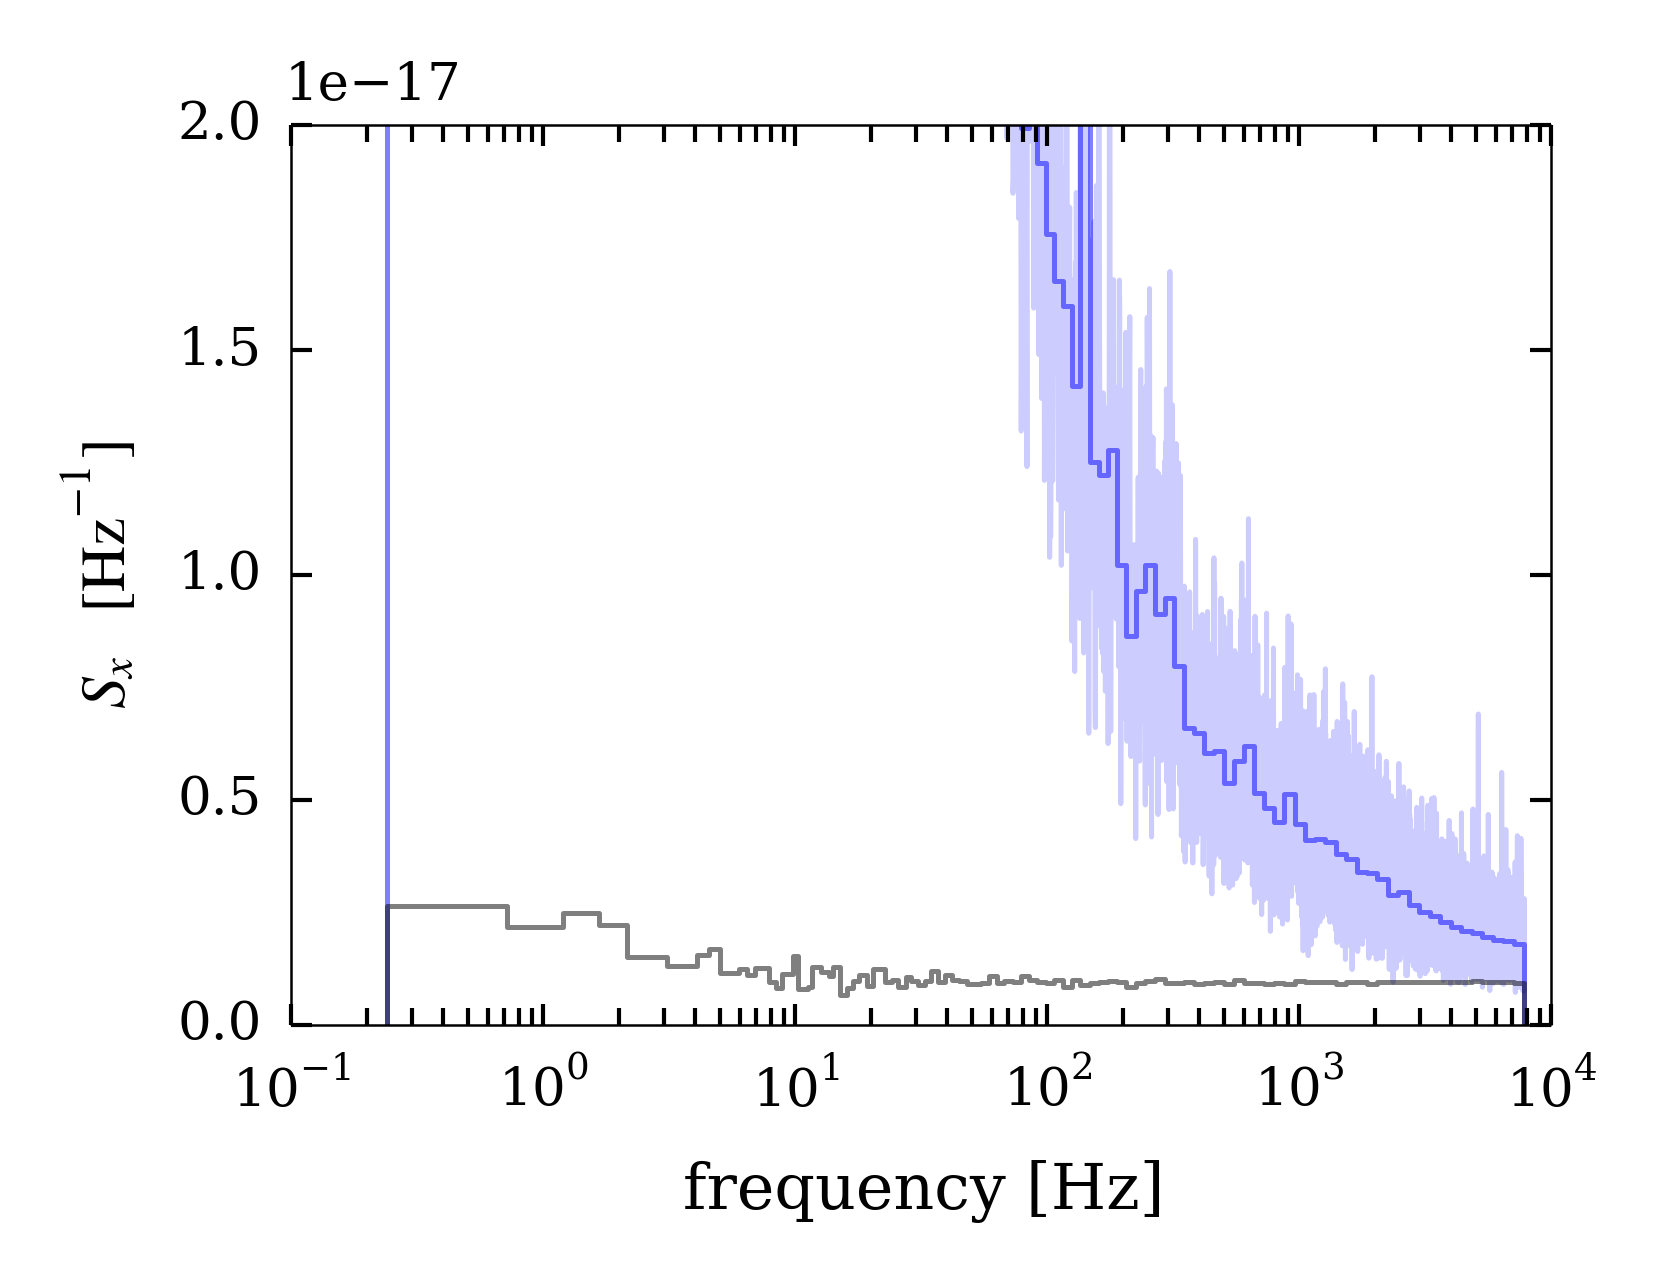

In [17]:
fig, ax = plt.subplots()

ax.plot(cw_snm_a23_tt07.pca_freq,
        cw_snm_a23_tt07.pca_eigvals[1],
        '-b', alpha=0.2)
histogram(ax, bins_a23_tt07, Sx_a23_tt07, color='blue', alpha=0.5)
histogram(ax, bins_a23_tt07, Si_a23_tt07, color='black', alpha=0.5)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_ylim(0, 2e-17);

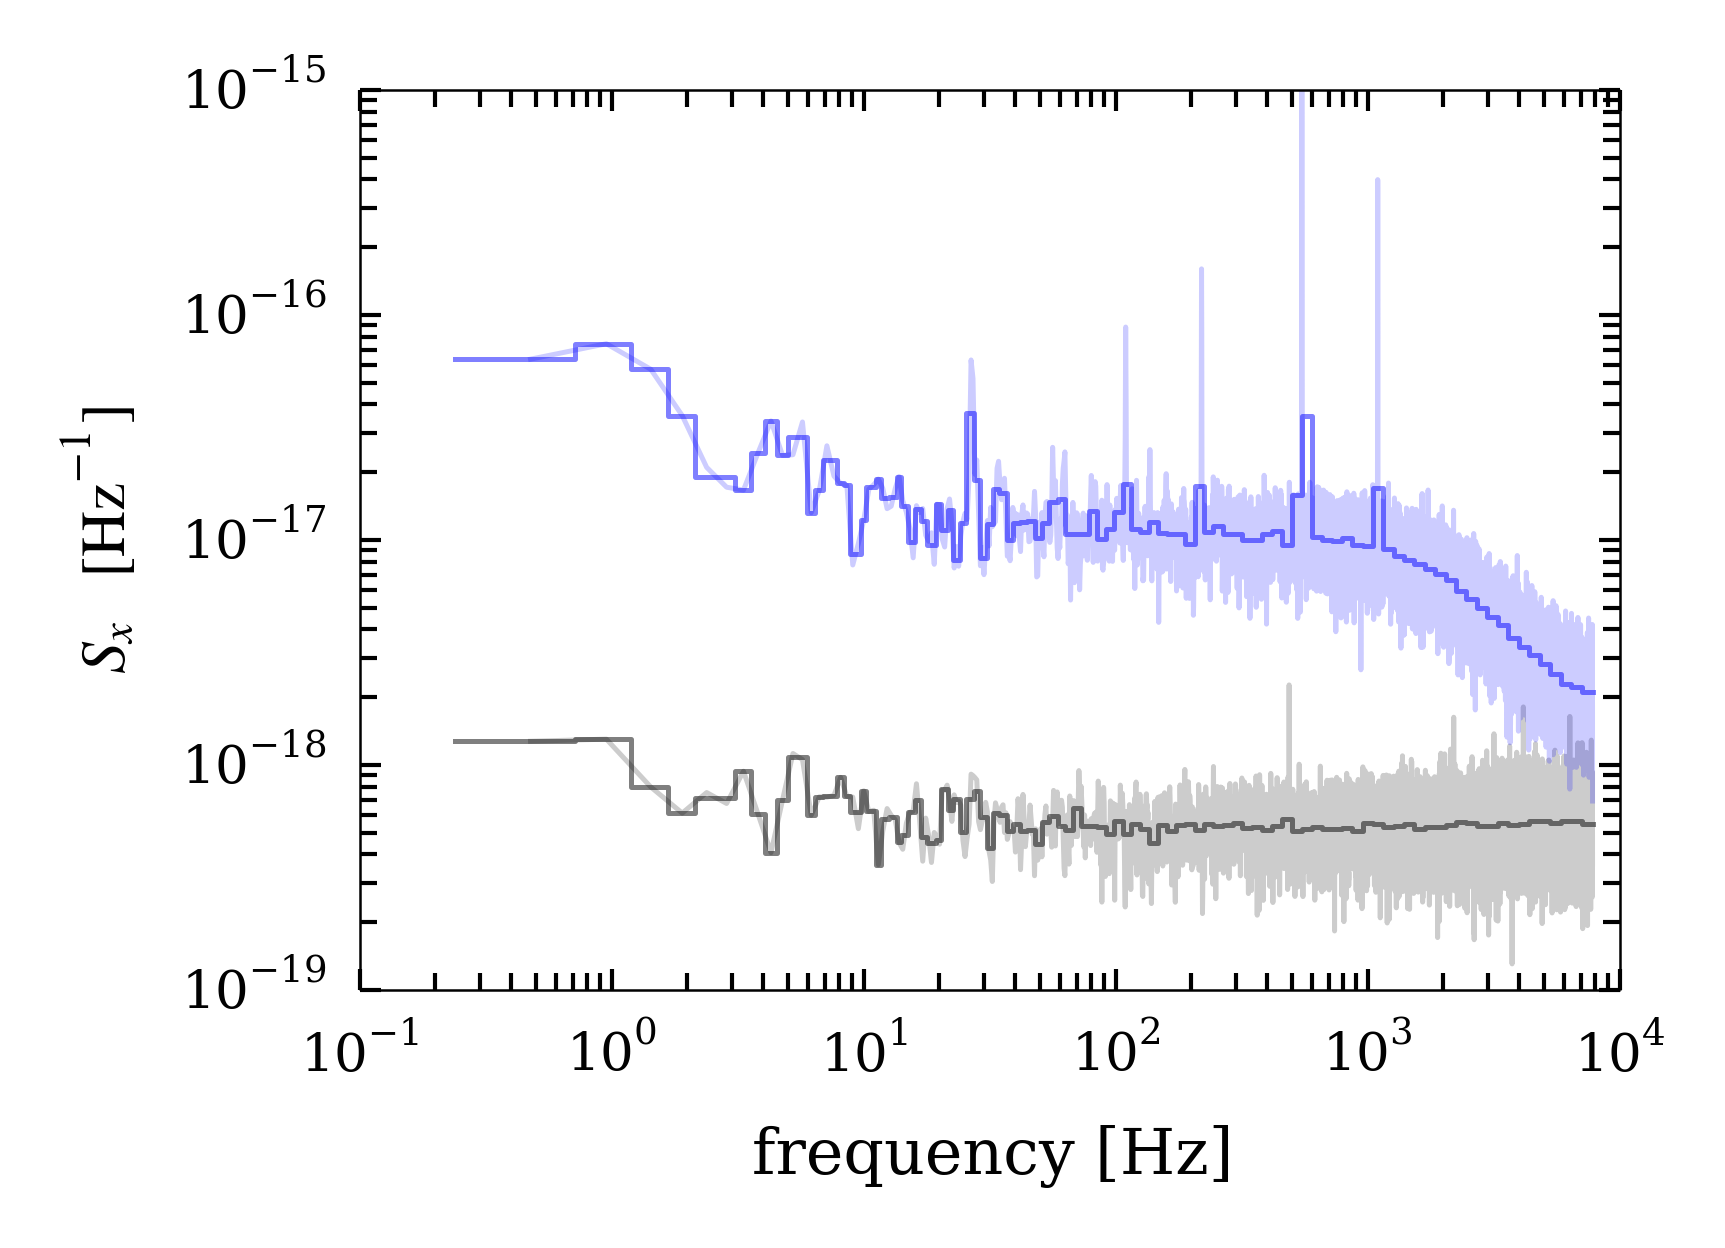

In [18]:
x_color = 'blue'
i_color = 'black'

fig, ax = plt.subplots()

ax.plot(bb_snm_a23_tt07.pca_freq,
        bb_snm_a23_tt07.pca_eigvals[0],
        '-', color=i_color, alpha=0.2)
ax.plot(bb_snm_a23_tt07.pca_freq,
        bb_snm_a23_tt07.pca_eigvals[1],
        '-', color=x_color, alpha=0.2)
histogram(ax, bins_bb_a23_tt07, Si_bb_a23_tt07, color=i_color, alpha=0.5)
histogram(ax, bins_bb_a23_tt07, Sx_bb_a23_tt07, color=x_color, alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_ylim(1e-19, 1e-15);

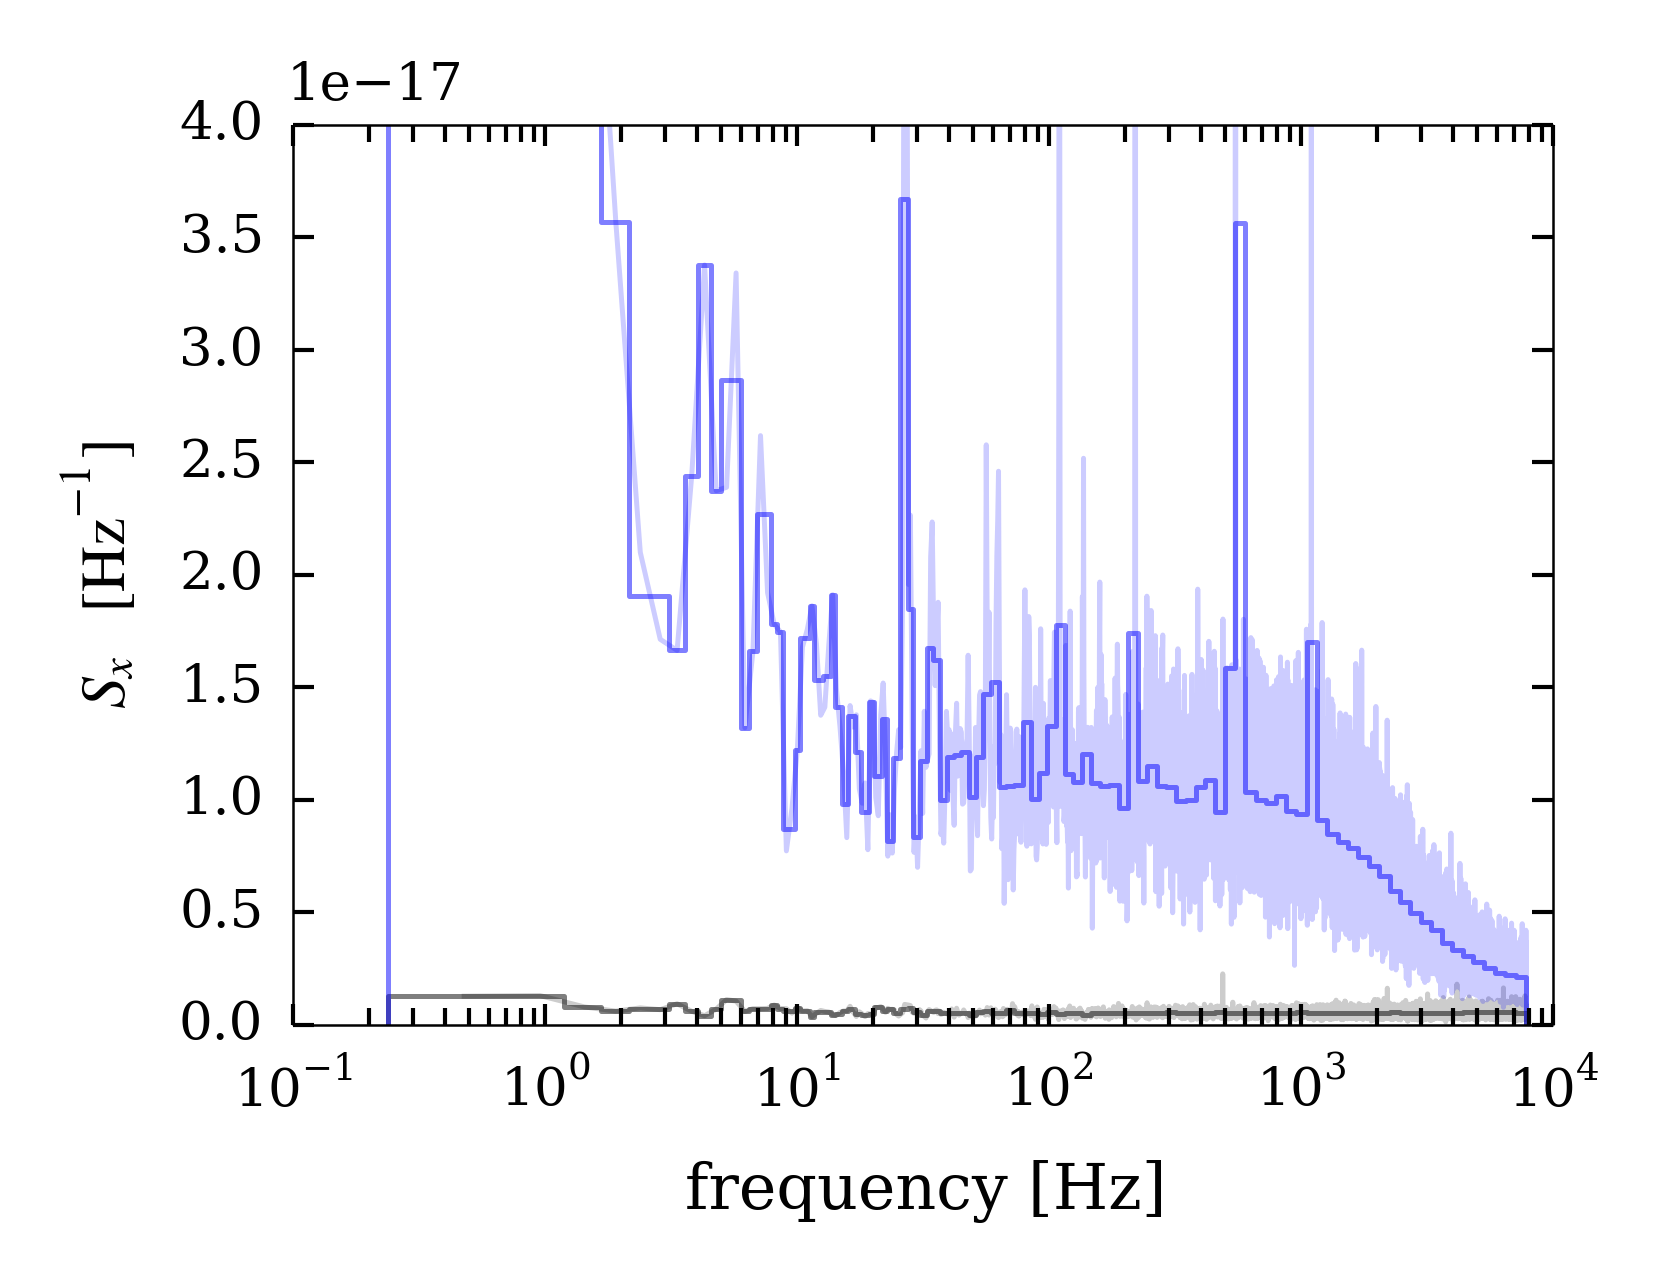

In [19]:
x_color = 'blue'
i_color = 'black'

fig, ax = plt.subplots()

ax.plot(bb_snm_a23_tt07.pca_freq,
        bb_snm_a23_tt07.pca_eigvals[0],
        '-', color=i_color, alpha=0.2)
ax.plot(bb_snm_a23_tt07.pca_freq,
        bb_snm_a23_tt07.pca_eigvals[1],
        '-', color=x_color, alpha=0.2)
histogram(ax, bins_bb_a23_tt07, Si_bb_a23_tt07, color=i_color, alpha=0.5)
histogram(ax, bins_bb_a23_tt07, Sx_bb_a23_tt07, color=x_color, alpha=0.5)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_ylim(0, 4e-17);

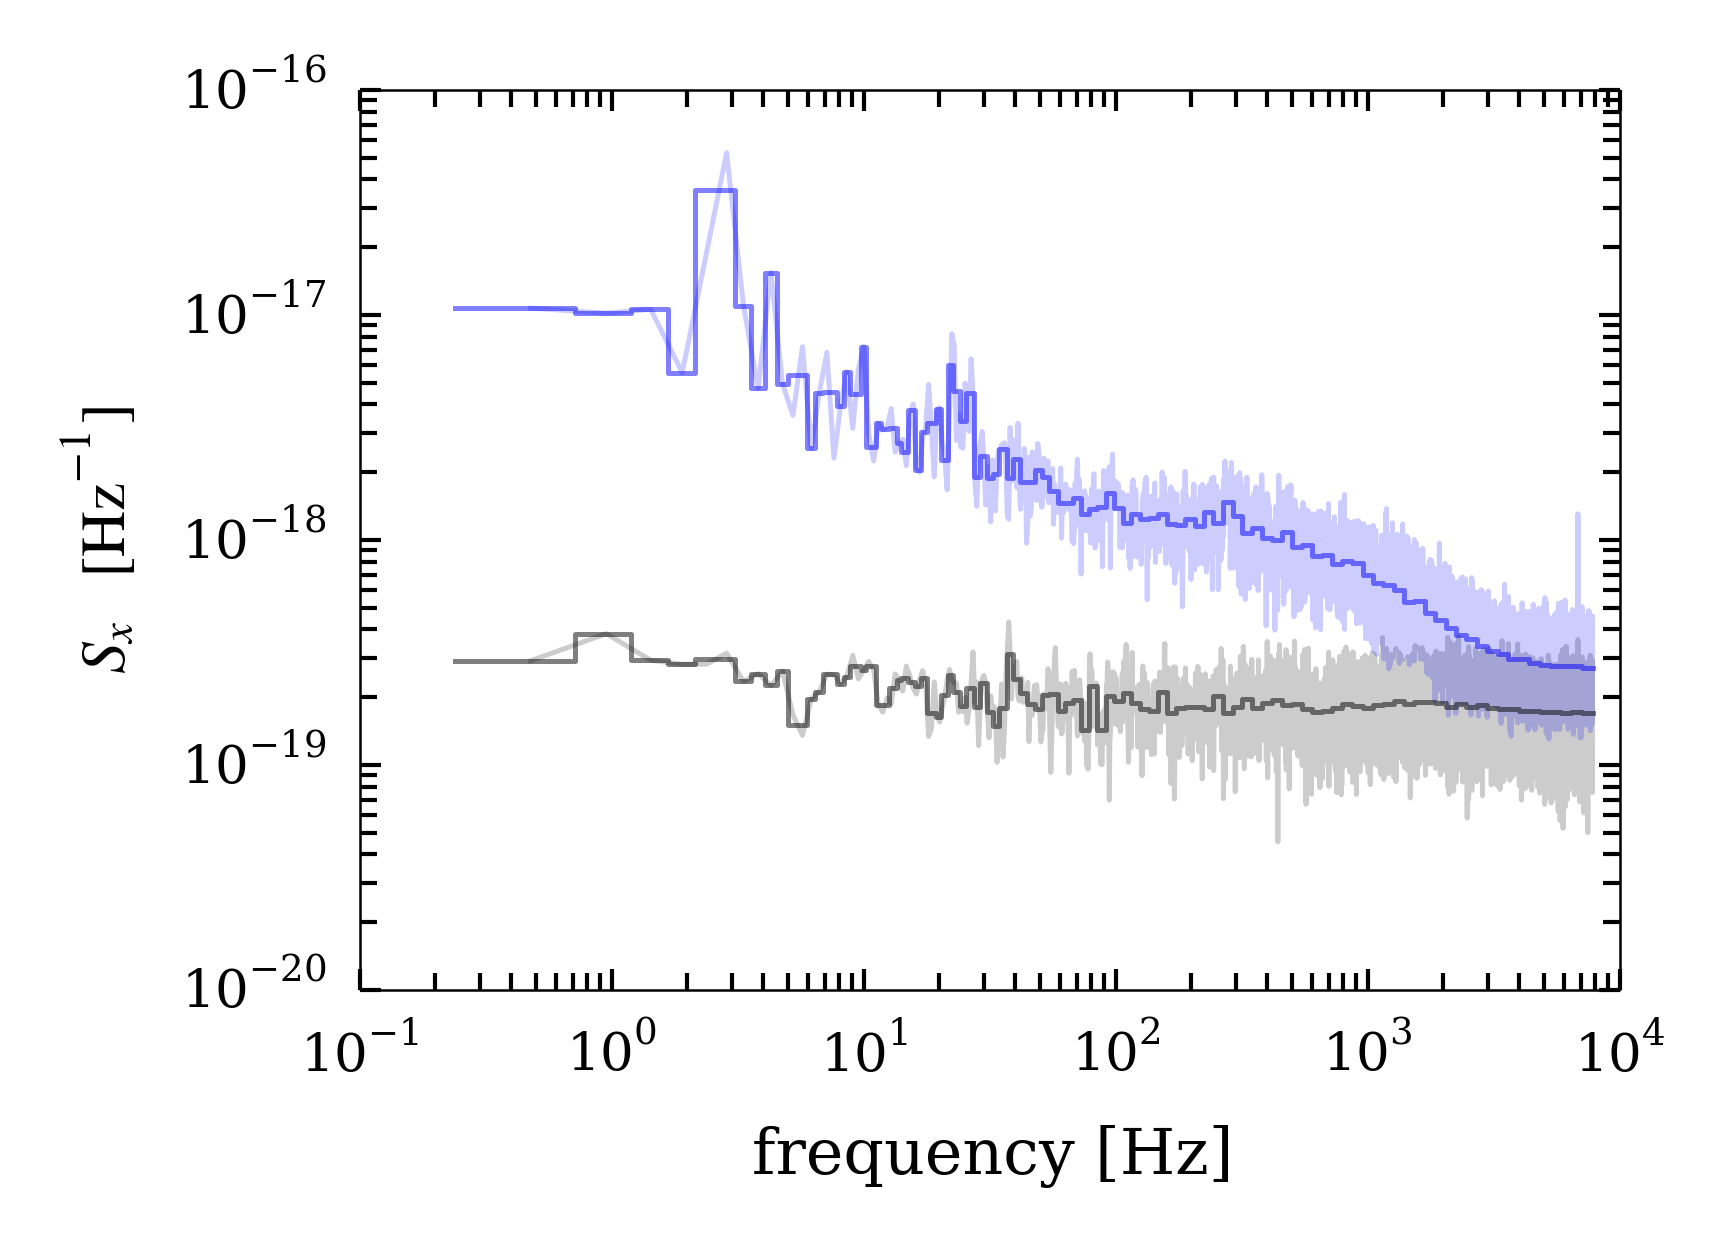

In [20]:
x_color = 'blue'
i_color = 'black'

fig, ax = plt.subplots()

ax.plot(bb_snm_a29_tt16.pca_freq,
        bb_snm_a29_tt16.pca_eigvals[0],
        '-', color=i_color, alpha=0.2)
ax.plot(bb_snm_a29_tt16.pca_freq,
        bb_snm_a29_tt16.pca_eigvals[1],
        '-', color=x_color, alpha=0.2)
histogram(ax, bins_bb_a29_tt16, Si_bb_a29_tt16, color=i_color, alpha=0.5)
histogram(ax, bins_bb_a29_tt16, Sx_bb_a29_tt16, color=x_color, alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
#ax.set_ylim(0, 1e-18);

# Compare SNM and SS

## Broadband, lowest power

In [21]:
snm_color = 'blue'
ss_color = 'green'

In [22]:
bb_rnc_tt16 = readoutnc.ReadoutNetCDF(os.path.join(data_directory, bb_ncs[2]))
bb_ss_a29_tt16 = load.sweepstream_from_rnc(bb_rnc_tt16, index_a29, index_a29, 8)
bb_ss_a29_tt16._set_psd_i_and_x(NFFT=pca_NFFT, window=mlab.window_hanning, detrend=mlab.detrend_mean)

In [23]:
bb_snm_a29_tt16.resonator_model.f_0

164.08773898041795

In [24]:
bb_ss_a29_tt16.sweep.resonator.f_0

164.08778576822078

(0, 10000)

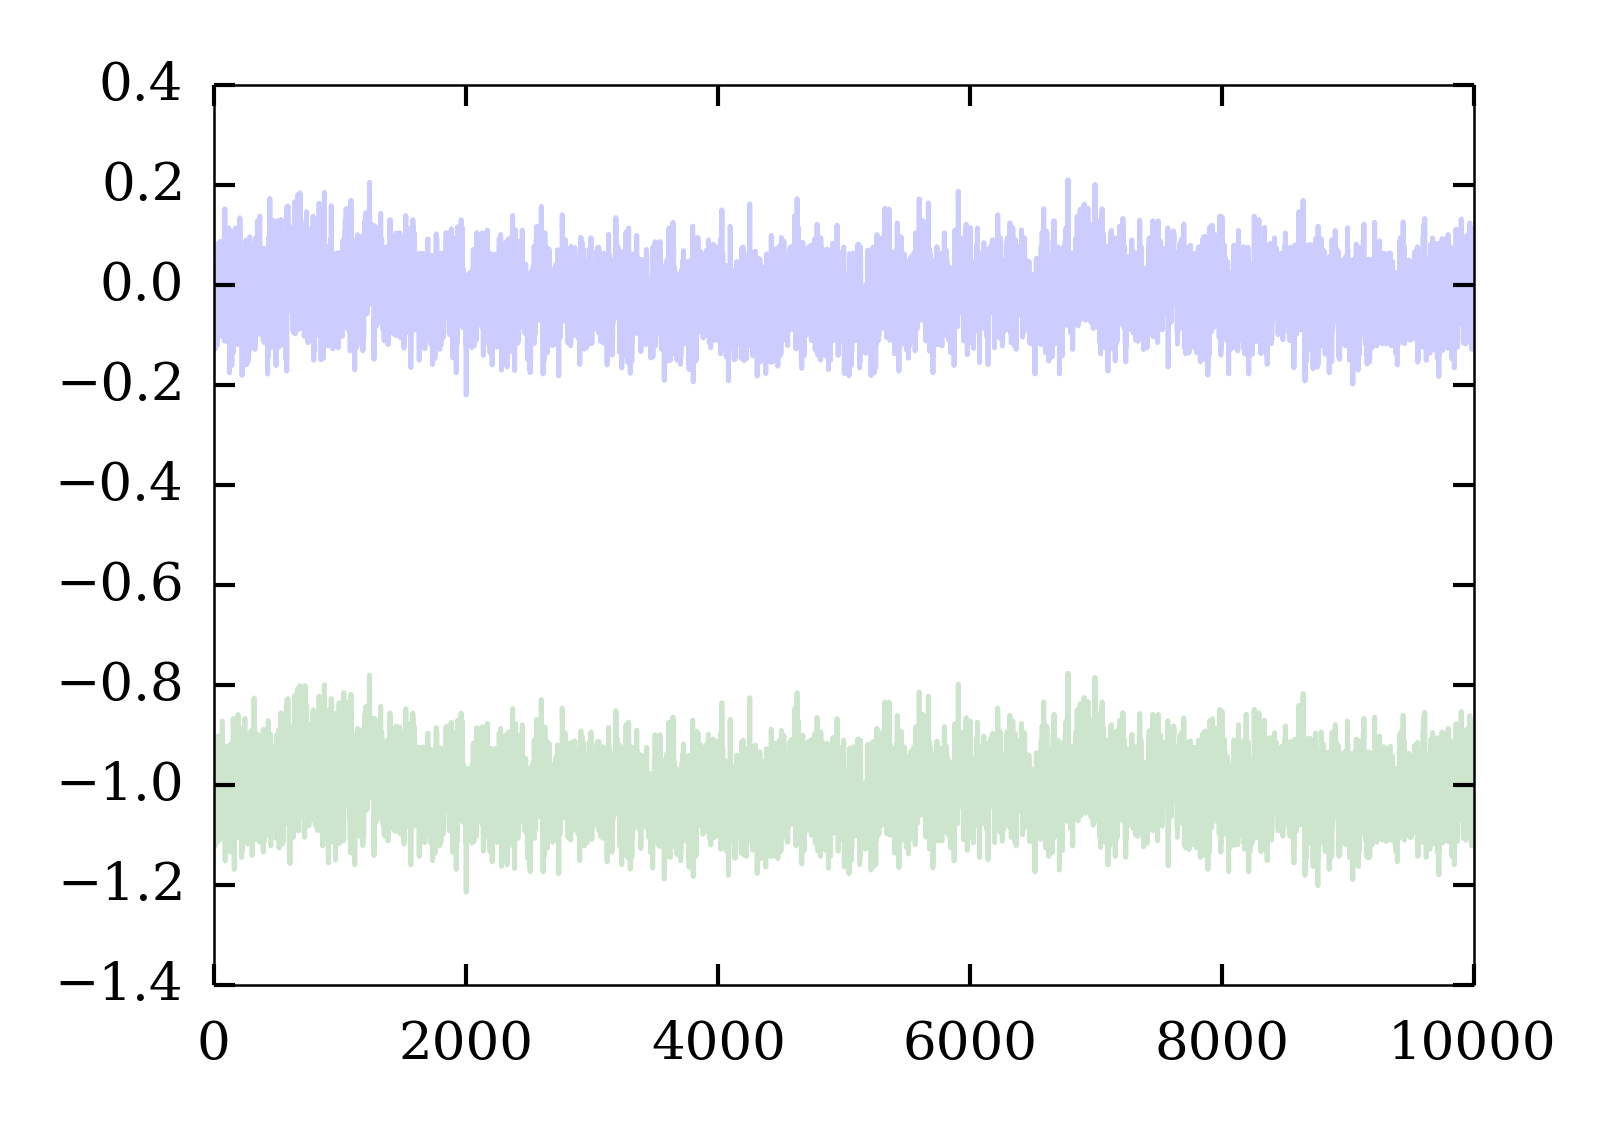

In [25]:
fig, ax = plt.subplots()
ax.plot(1e6 * bb_snm_a29_tt16.fractional_fluctuation_timeseries.real, alpha=0.2)
ax.plot(1e6 * bb_ss_a29_tt16.x, alpha=0.2)
ax.set_xlim(0, 10000)

In [26]:
snm_bins, snm_Sx, snm_counts = snm_log_bin(bb_snm_a29_tt16, eigvals=1)
snm_bins, snm_Si, snm_counts = snm_log_bin(bb_snm_a29_tt16, eigvals=0)
ss_bins, ss_Sx, ss_counts = ss_log_bin(bb_ss_a29_tt16, quadrature='x')
ss_bins, ss_Si, ss_counts = ss_log_bin(bb_ss_a29_tt16, quadrature='i')

In [32]:
!pwd

/home/flanigan/notebooks/mkid/2015_Flanigan/08_major_revision


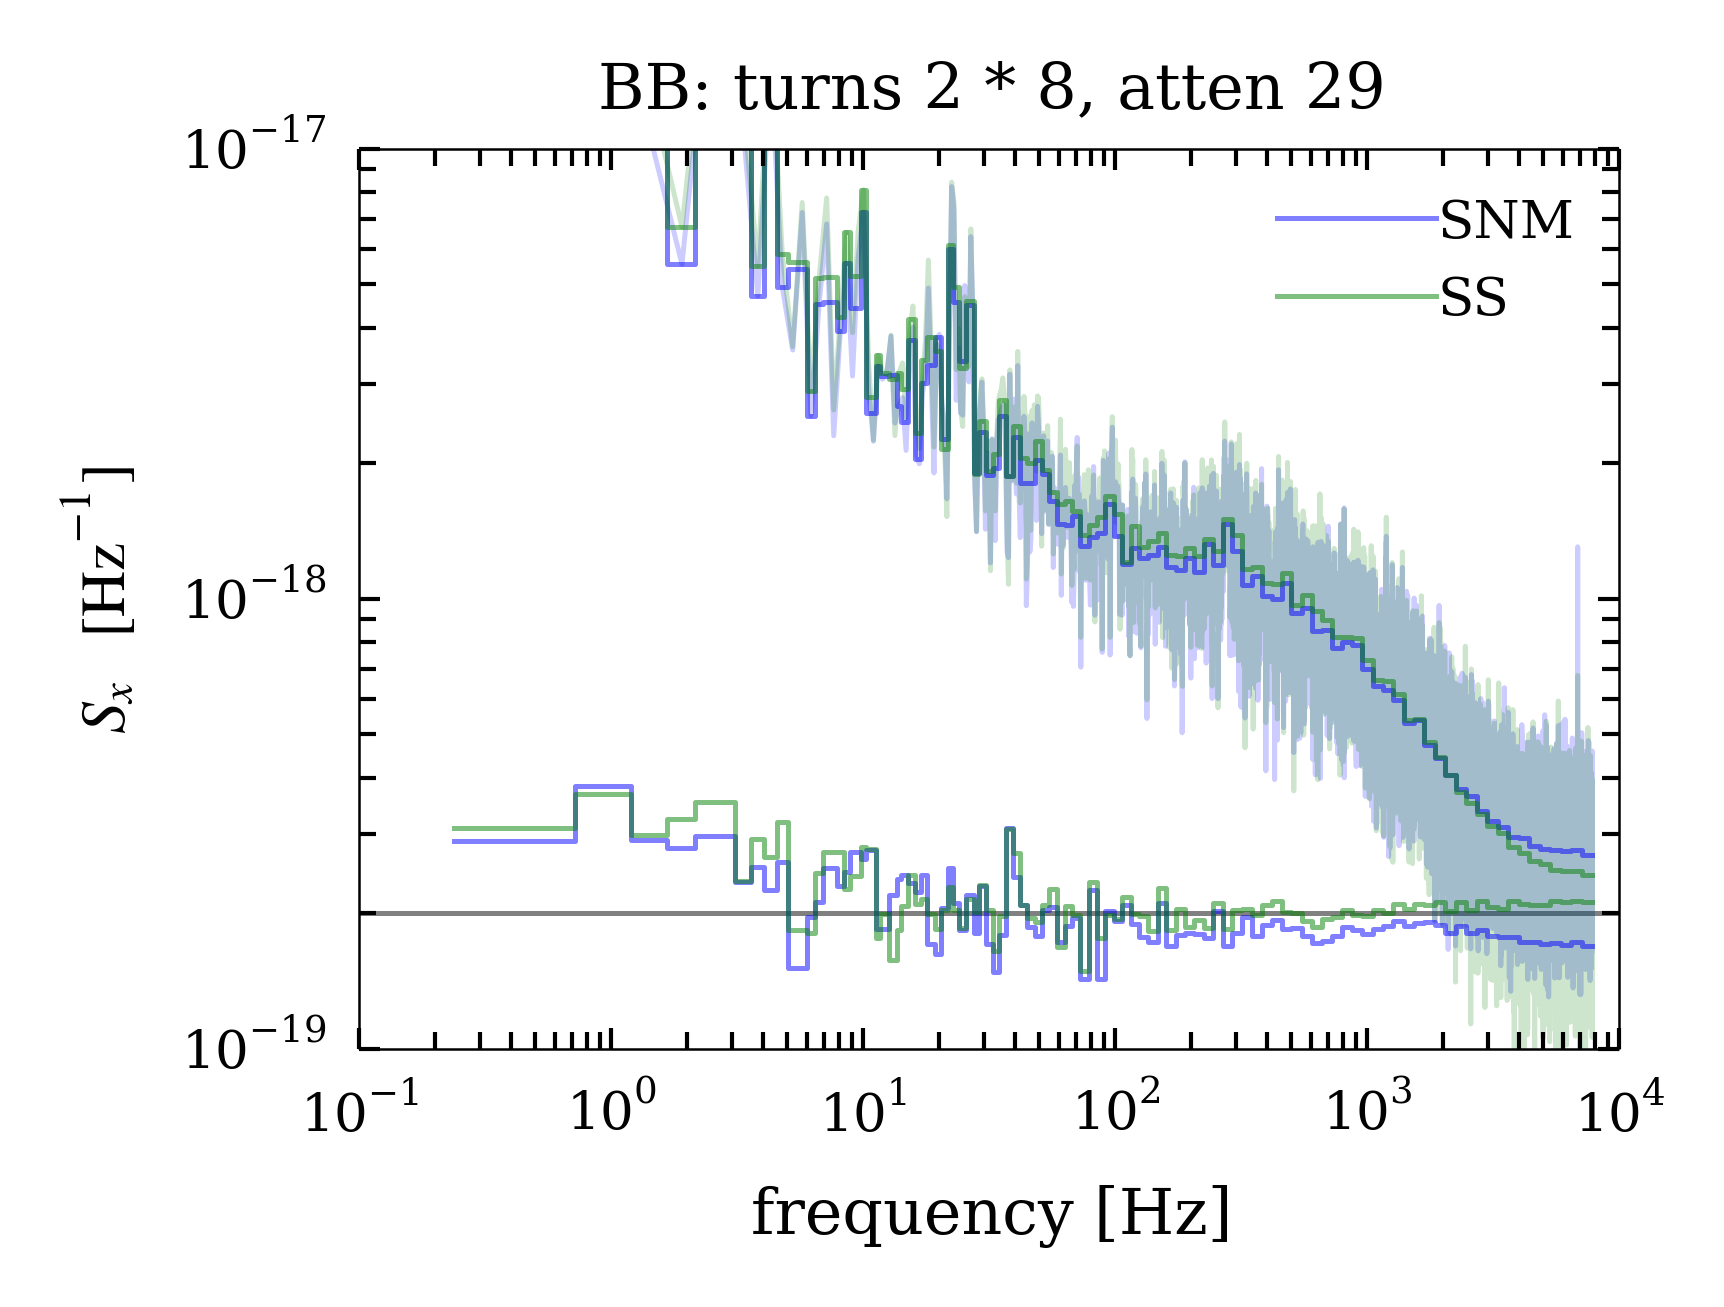

In [31]:
fig, ax = plt.subplots()

ax.axhline(2e-19, color='gray')
ax.plot(bb_snm_a29_tt16.pca_freq, bb_snm_a29_tt16.pca_eigvals[1], color=snm_color, alpha=0.2)
ax.plot(bb_ss_a29_tt16.psd_frequency, bb_ss_a29_tt16.psd_xx, color=ss_color, alpha=0.2)
histogram(ax, snm_bins, snm_Sx, color=snm_color, alpha=0.5, label='SNM')
histogram(ax, snm_bins, snm_Si, color=snm_color, alpha=0.5)
histogram(ax, ss_bins, ss_Sx, color=ss_color, alpha=0.5, label='SS')
histogram(ax, ss_bins, ss_Si / 4, color=ss_color, alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlim(1e-1, 1e4)
ax.set_ylim(1e-19, 1e-17)
ax.legend(loc='best')
ax.set_title("BB: turns 2 * 8, atten 29");
fig.savefig('bb_turns_2x8_atten_29_res_18.pdf', bbox_inches='tight');

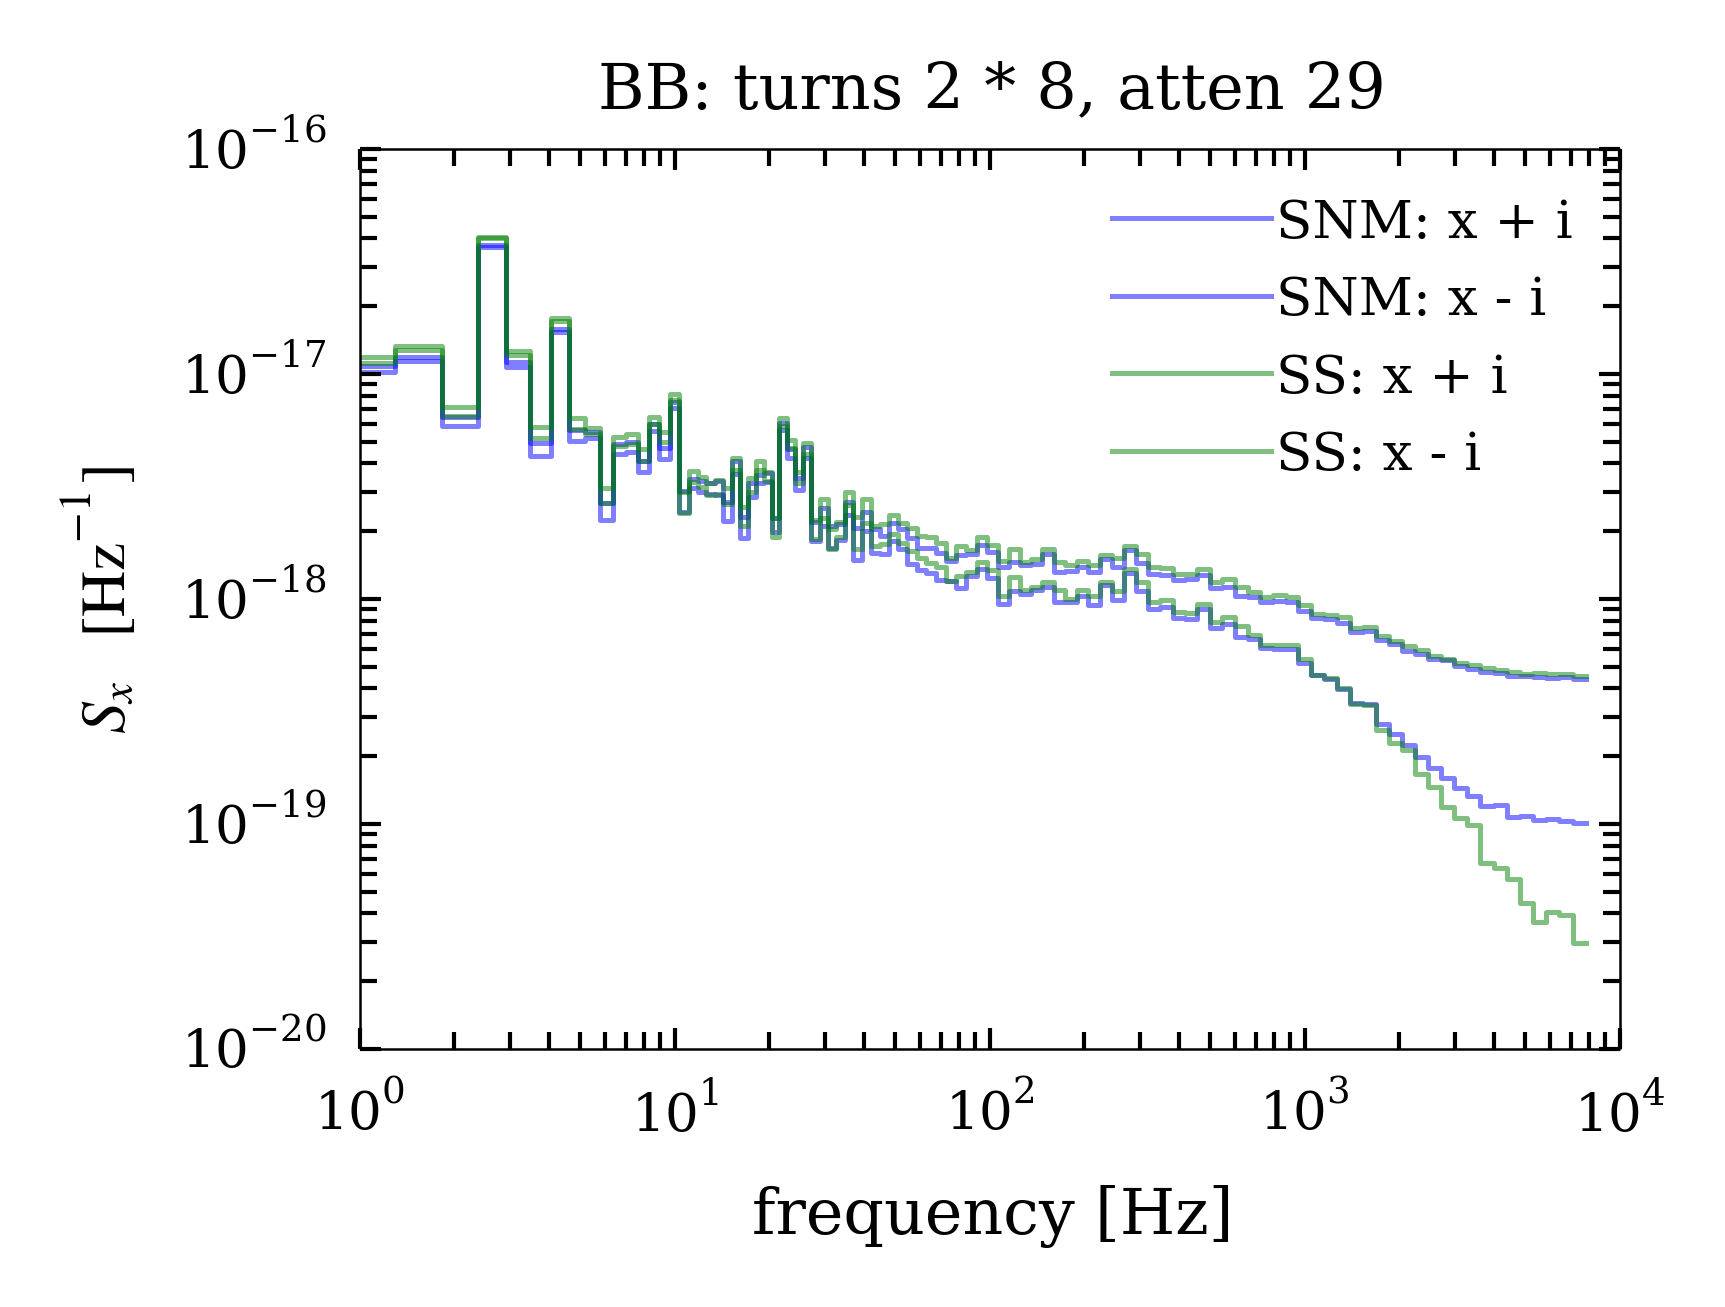

In [28]:
fig, ax = plt.subplots()

histogram(ax, snm_bins, snm_Sx + snm_Si, color=snm_color, alpha=0.5, label='SNM: x + i')
histogram(ax, snm_bins, snm_Sx - snm_Si, color=snm_color, alpha=0.5, label='SNM: x - i')
histogram(ax, ss_bins, ss_Sx + ss_Si / 4, color=ss_color, alpha=0.5, label='SS: x + i')
histogram(ax, ss_bins, ss_Sx - ss_Si / 4, color=ss_color, alpha=0.5, label='SS: x - i')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlim(1e0, 1e4)
#ax.set_ylim(1e-19, 1e-17)
ax.legend(loc='best')
ax.set_title("BB: turns 2 * 8, atten 29");

This looks like total noise is conserved between x and i quadratures, but PCA attributes more of it to the x quadrature in the device rolloff.

## Continuous-wave, highest power

In [29]:
cw_rnc_tt07 = readoutnc.ReadoutNetCDF(os.path.join(data_directory, cw_ncs[11]))
cw_ss_a29_tt07 = load.sweepstream_from_rnc(cw_rnc_tt07, index_a29, index_a29, 8)
cw_ss_a29_tt07._set_psd_i_and_x(NFFT=pca_NFFT, window=mlab.window_hanning, detrend=mlab.detrend_mean)
cw_ss_a23_tt07 = load.sweepstream_from_rnc(cw_rnc_tt07, index_a23, index_a23, 8)
cw_ss_a23_tt07._set_psd_i_and_x(NFFT=pca_NFFT, window=mlab.window_hanning, detrend=mlab.detrend_mean)

(0, 10000)

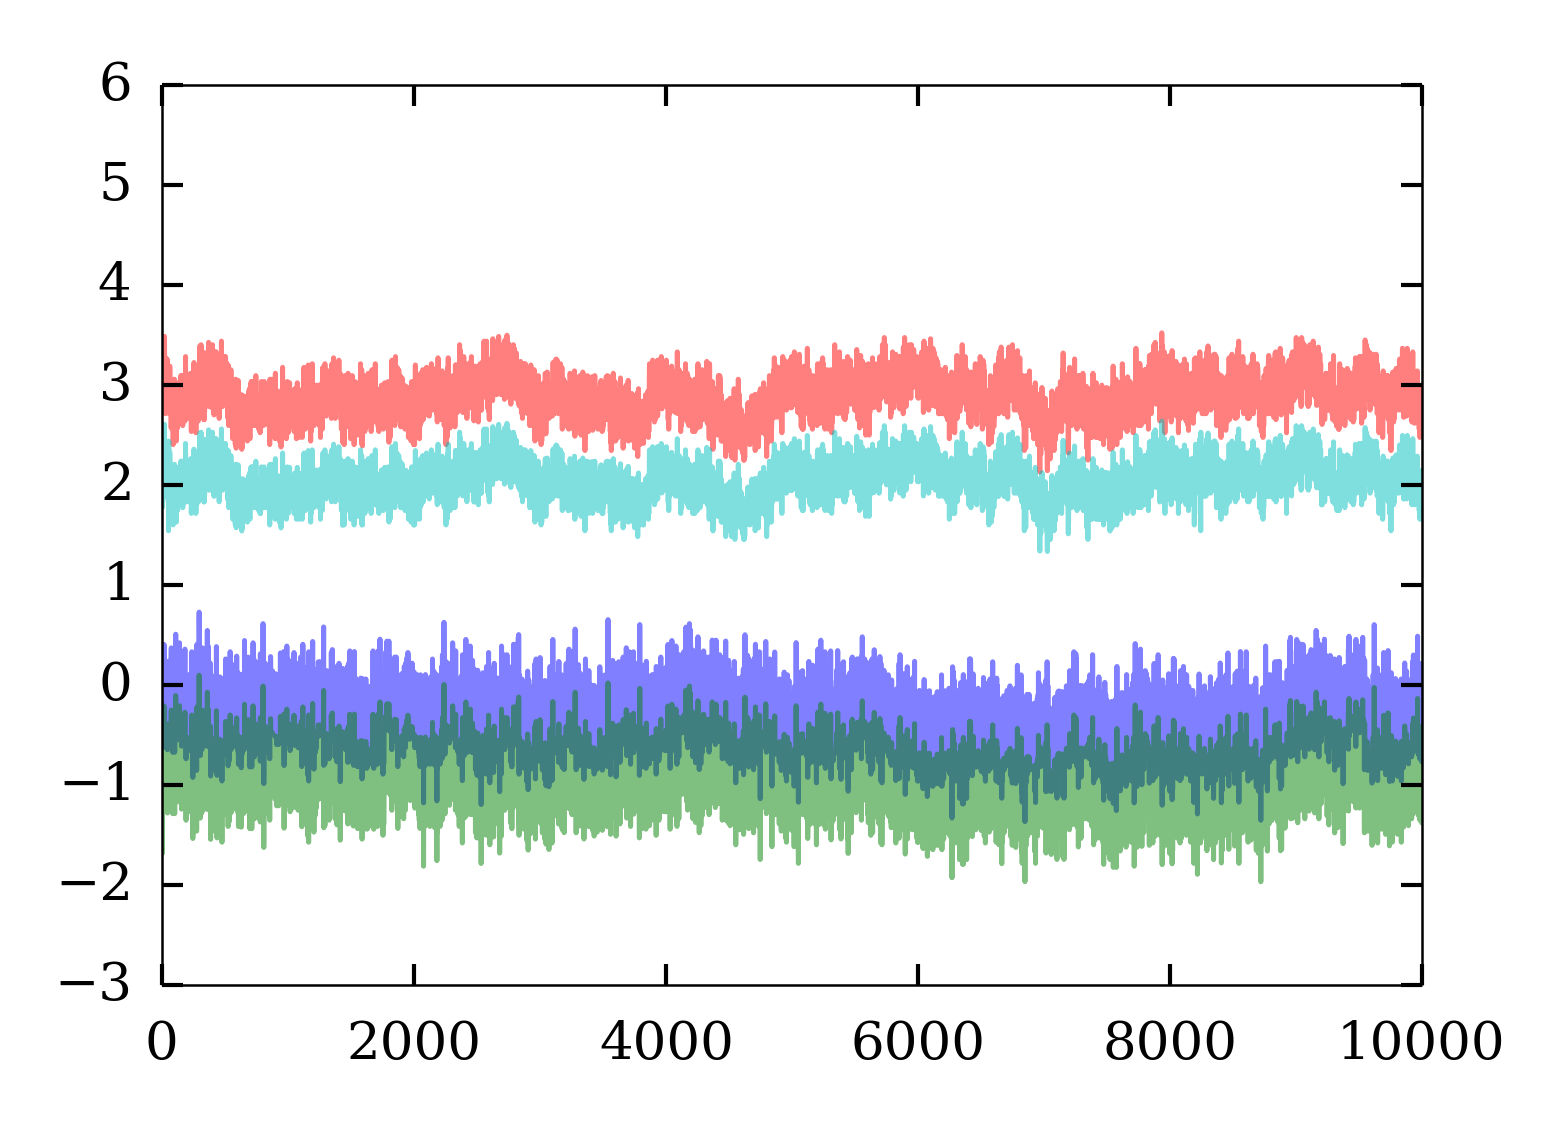

In [30]:
fig, ax = plt.subplots()
ax.plot(1e6 * cw_snm_a29_tt07.fractional_fluctuation_timeseries.real, alpha=0.5)
ax.plot(1e6 * cw_ss_a29_tt07.x, alpha=0.5)
offset = 3
ax.plot(1e6 * cw_snm_a23_tt07.fractional_fluctuation_timeseries.real + offset, alpha=0.5)
ax.plot(1e6 * cw_ss_a23_tt07.x + offset, alpha=0.5)
ax.set_xlim(0, 10000)

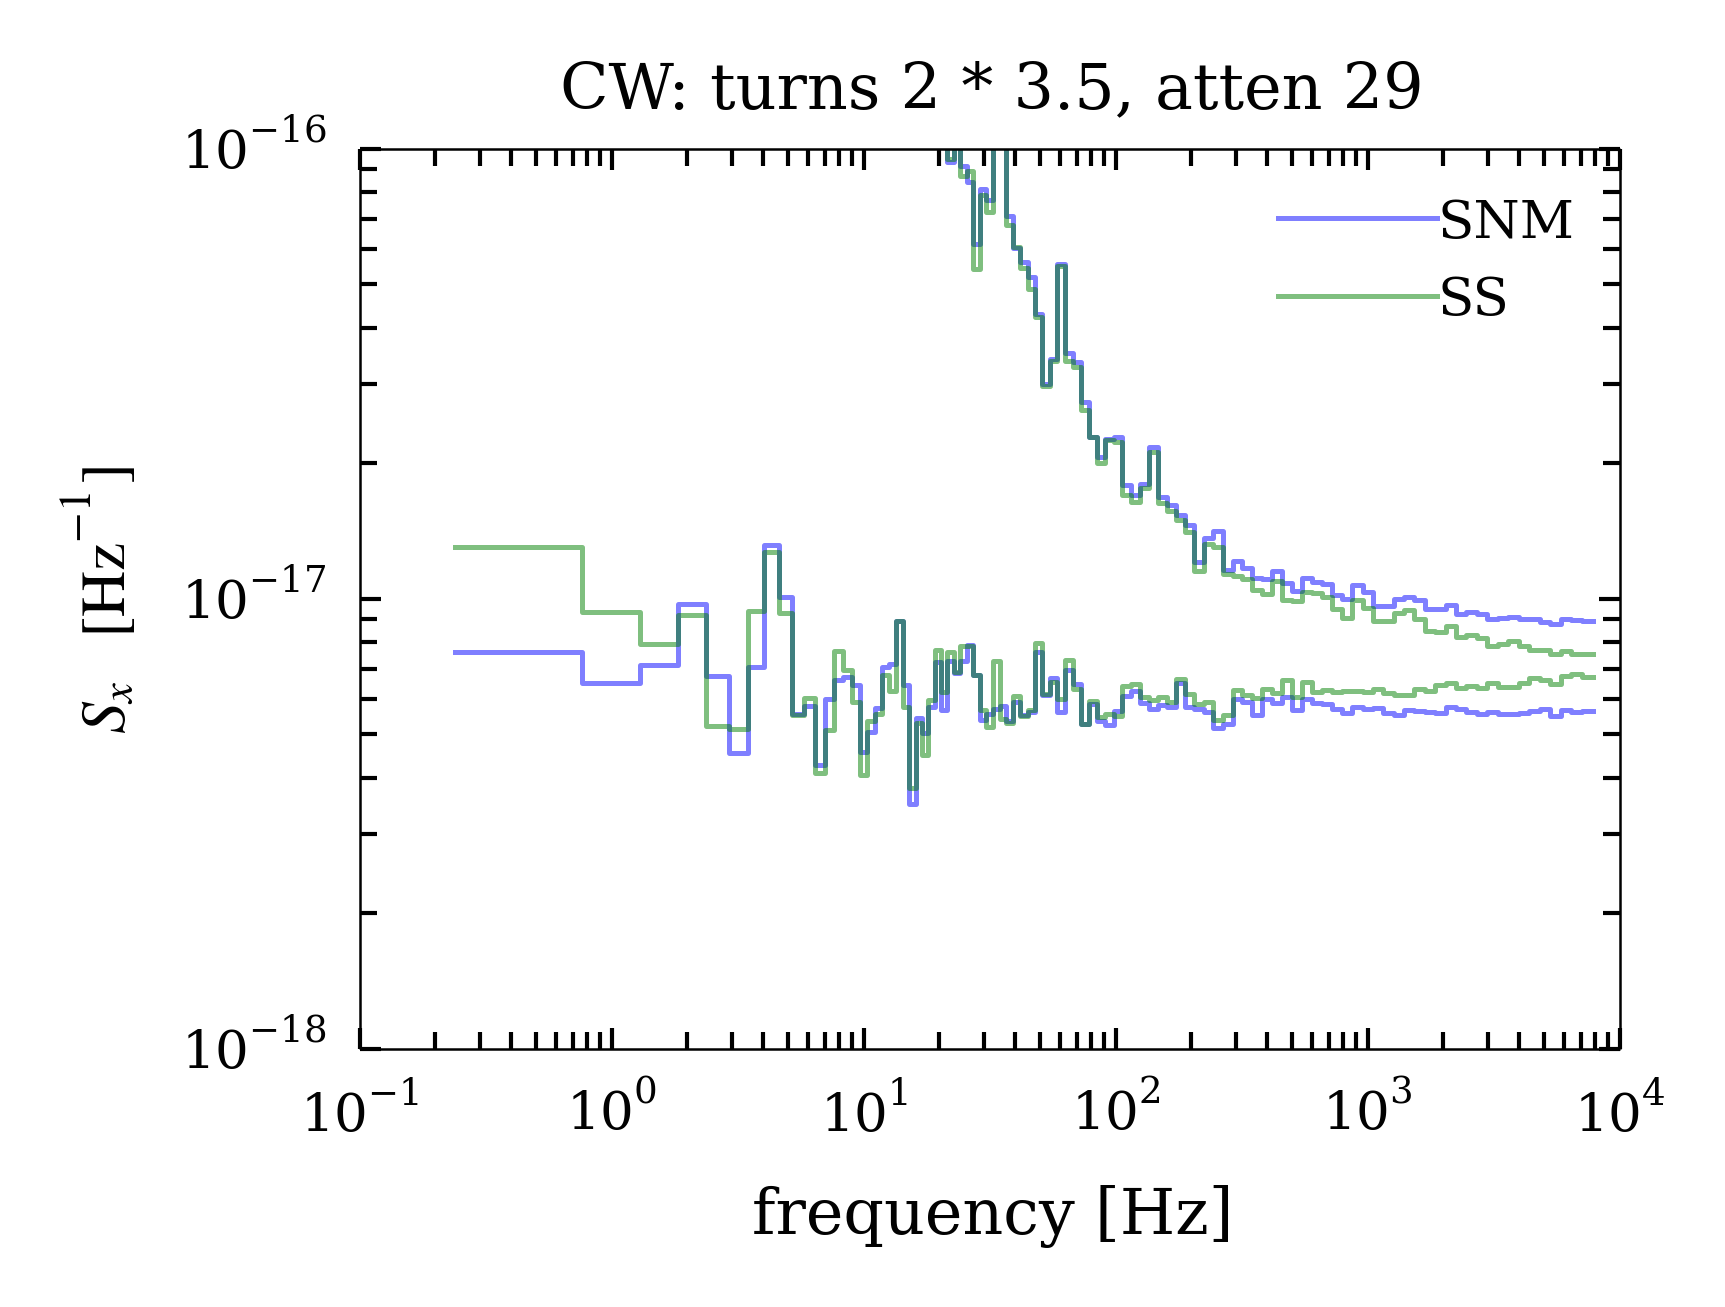

In [31]:
snm_bins, snm_Sx, snm_counts = snm_log_bin(cw_snm_a29_tt07, eigvals=1)
snm_bins, snm_Si, snm_counts = snm_log_bin(cw_snm_a29_tt07, eigvals=0)
ss_bins, ss_Sx, ss_counts = ss_log_bin(cw_ss_a29_tt07, quadrature='x')
ss_bins, ss_Si, ss_counts = ss_log_bin(cw_ss_a29_tt07, quadrature='i')

fig, ax = plt.subplots()

ax.axhline(2e-19, color='gray')
histogram(ax, snm_bins, snm_Sx, color=snm_color, alpha=0.5, label='SNM')
histogram(ax, snm_bins, snm_Si, color=snm_color, alpha=0.5)
histogram(ax, ss_bins, ss_Sx, color=ss_color, alpha=0.5, label='SS')
histogram(ax, ss_bins, ss_Si / 4, color=ss_color, alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlim(1e-1, 1e4)
ax.set_ylim(1e-18, 1e-16)
ax.legend(loc='best')
ax.set_title("CW: turns 2 * 3.5, atten 29");

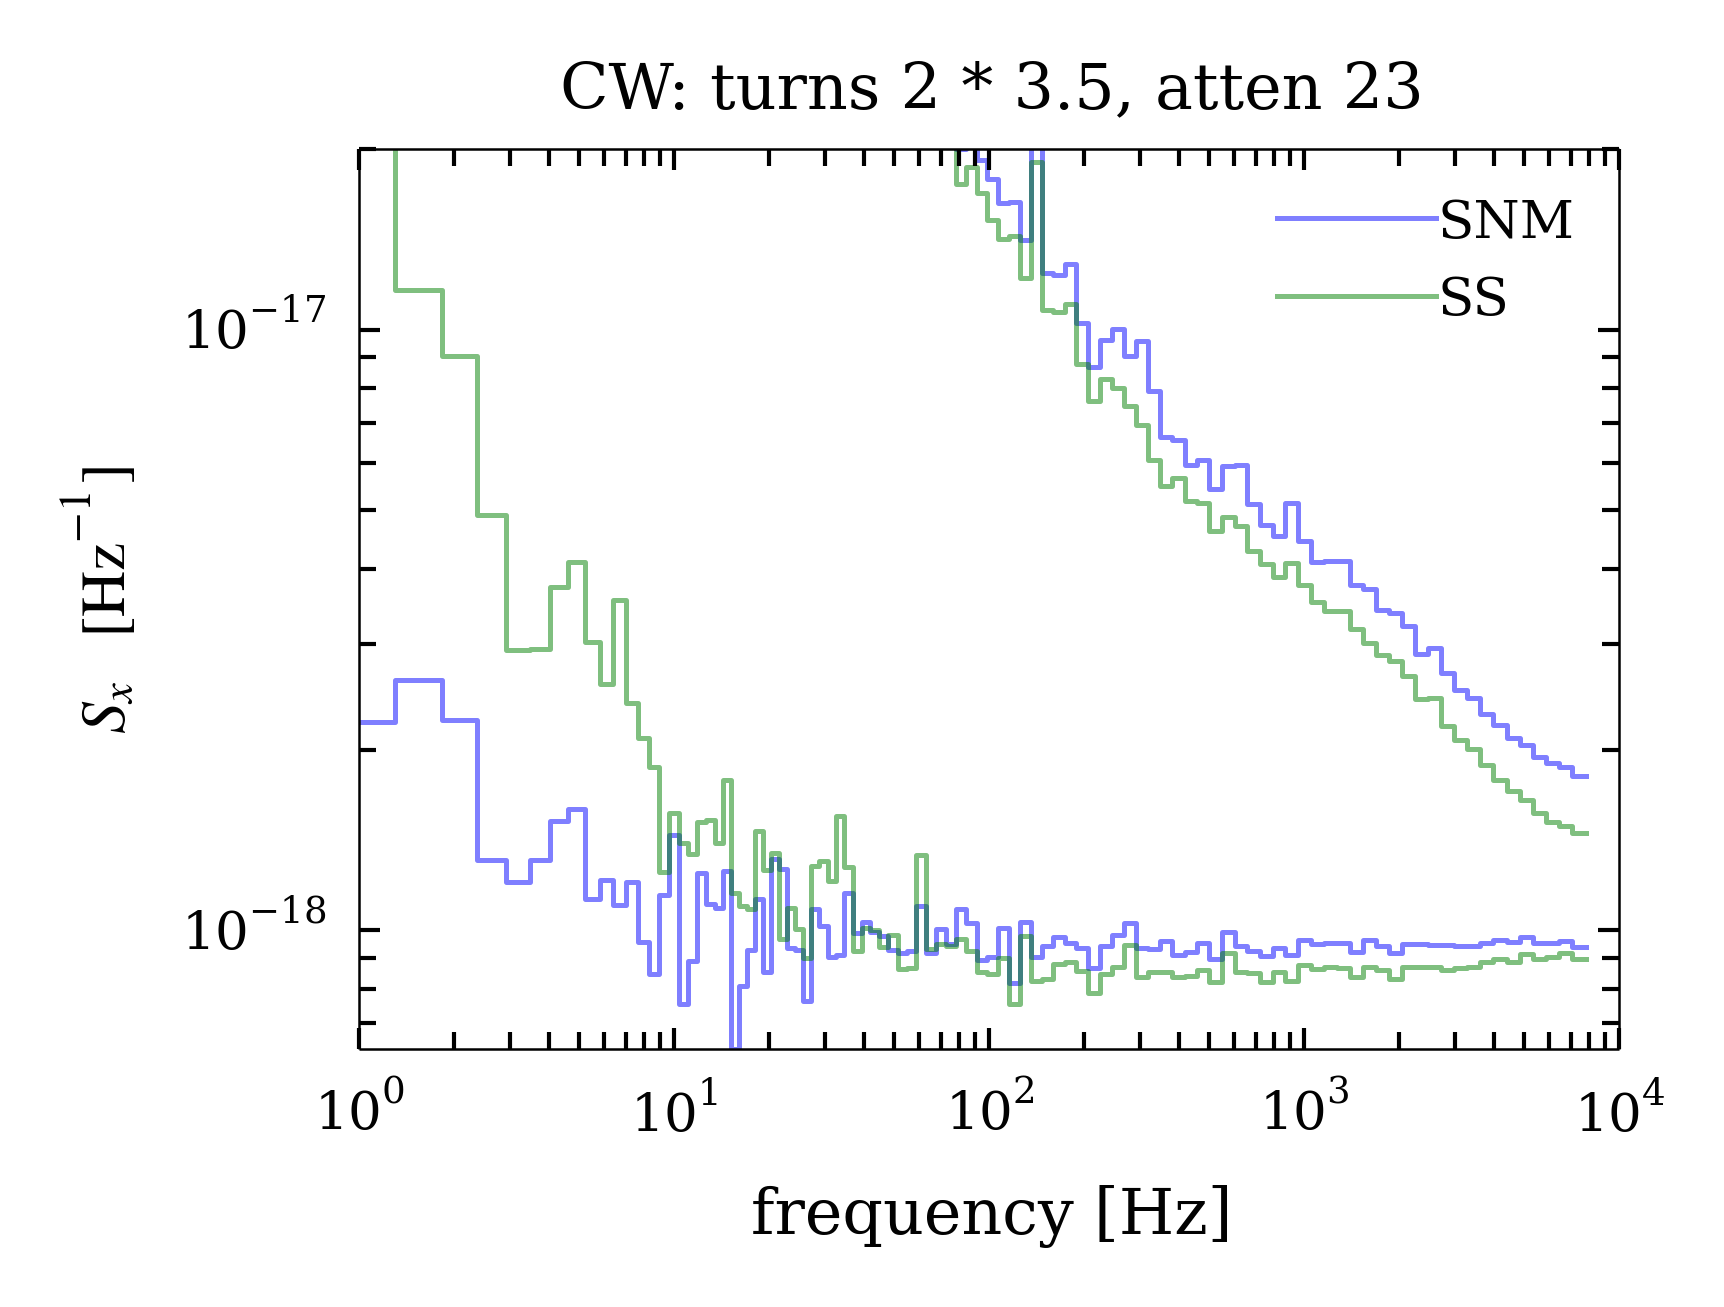

In [32]:
snm_bins, snm_Sx, snm_counts = snm_log_bin(cw_snm_a23_tt07, eigvals=1)
snm_bins, snm_Si, snm_counts = snm_log_bin(cw_snm_a23_tt07, eigvals=0)
ss_bins, ss_Sx, ss_counts = ss_log_bin(cw_ss_a23_tt07, quadrature='x')
ss_bins, ss_Si, ss_counts = ss_log_bin(cw_ss_a23_tt07, quadrature='i')

fig, ax = plt.subplots()

histogram(ax, snm_bins, snm_Sx, color=snm_color, alpha=0.5, label='SNM')
histogram(ax, snm_bins, snm_Si, color=snm_color, alpha=0.5)
histogram(ax, ss_bins, ss_Sx, color=ss_color, alpha=0.5, label='SS')
histogram(ax, ss_bins, ss_Si / 4, color=ss_color, alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlim(1e0, 1e4)
ax.set_ylim(1e-19, 1e-17)
ax.set_ylim(0, 2e-17)
ax.legend(loc='best')
ax.set_title("CW: turns 2 * 3.5, atten 23");

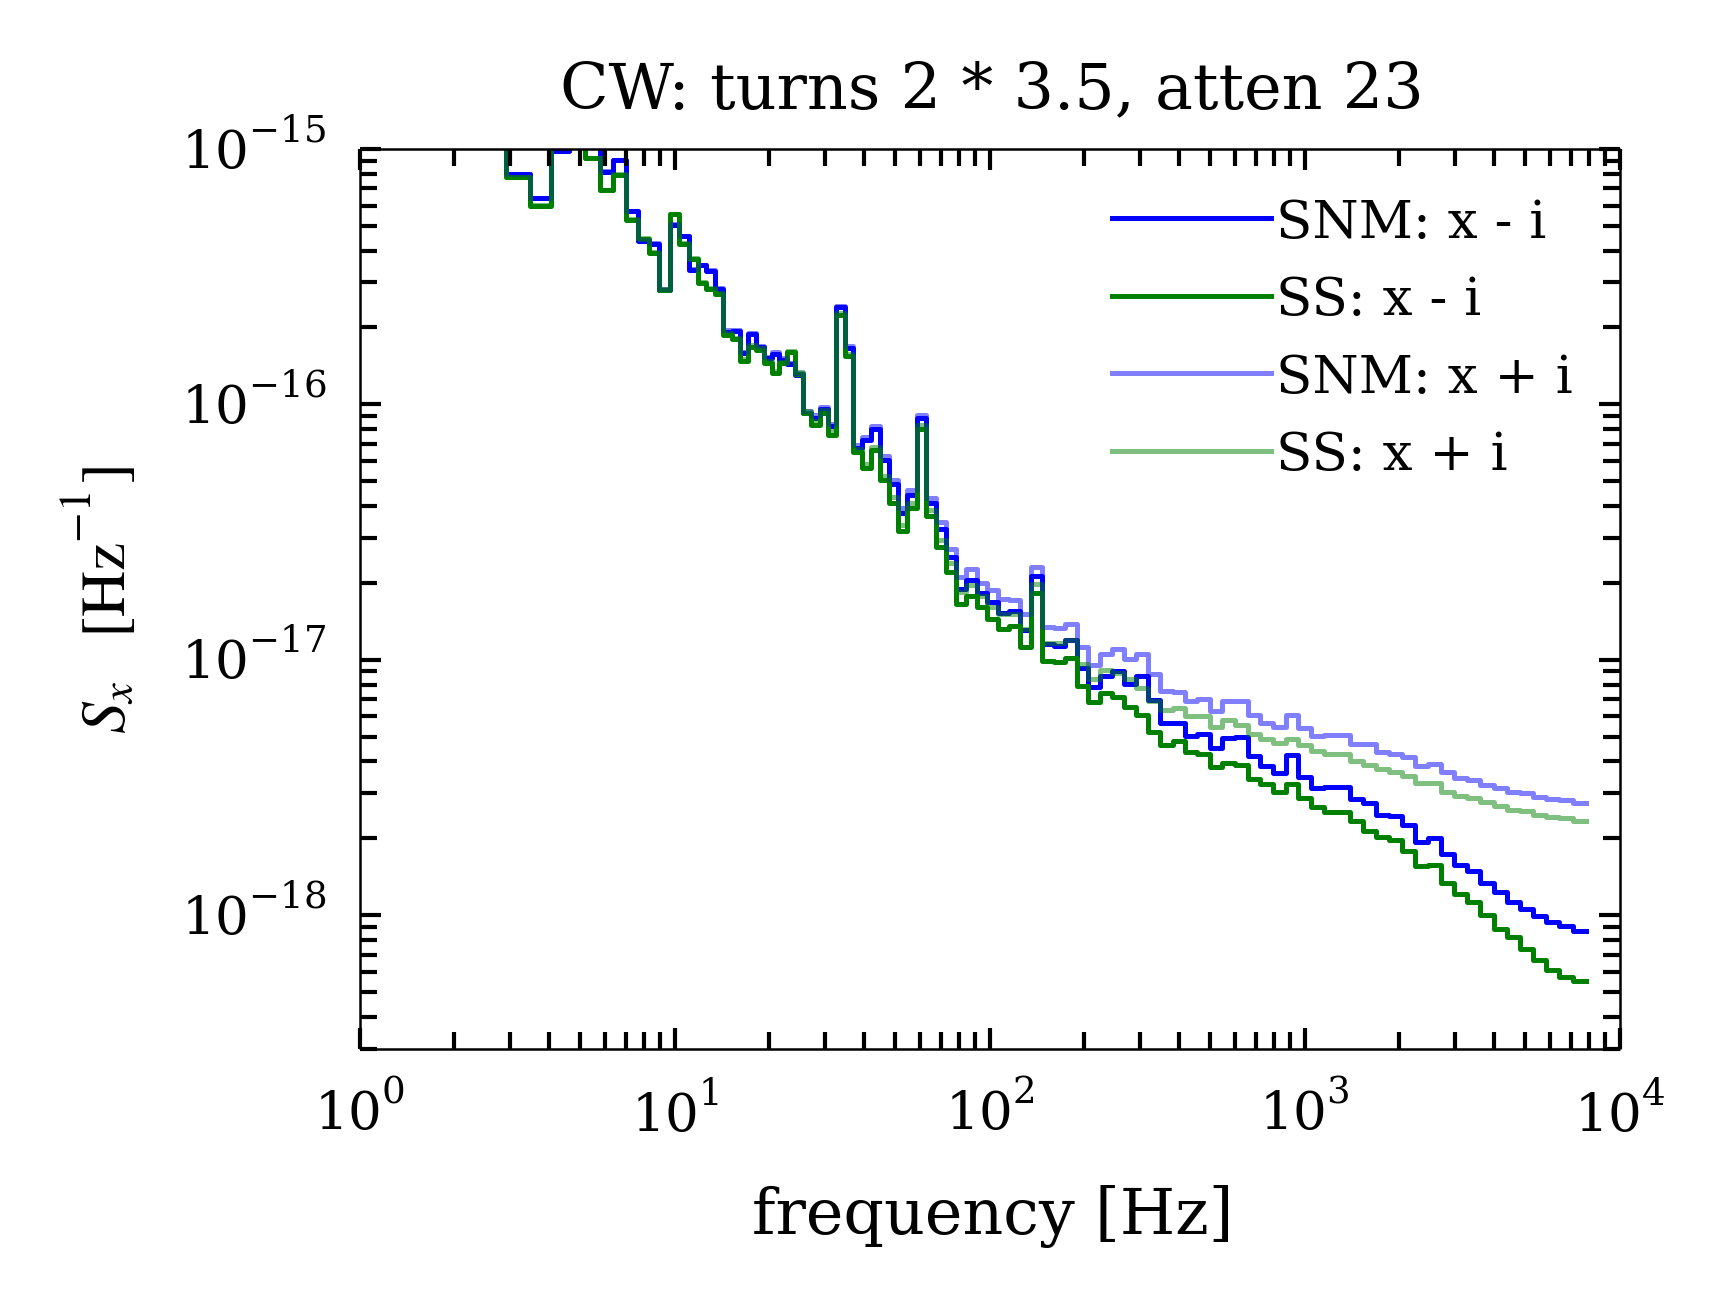

In [33]:
fig, ax = plt.subplots()

histogram(ax, snm_bins, snm_Sx - snm_Si, color=snm_color, alpha=1, label='SNM: x - i')
histogram(ax, ss_bins, ss_Sx - ss_Si / 4, color=ss_color, alpha=1, label='SS: x - i')
histogram(ax, snm_bins, snm_Sx + snm_Si, color=snm_color, alpha=0.5, label='SNM: x + i')
histogram(ax, ss_bins, ss_Sx + ss_Si / 4, color=ss_color, alpha=0.5, label='SS: x + i')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlim(1e0, 1e4)
ax.set_ylim(3e-19, 1e-15)
ax.legend(loc='best')
ax.set_title("CW: turns 2 * 3.5, atten 23");